In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## **Preprocessing**

First, we need to get the description of all attributes. This includes missing values, duplicate data, and outliers.

In [2]:
# mengecek nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [3]:
mobile = pd.read_csv("mobile_phone.csv")
#Deskripsi numerikk
mobile.describe(include="number")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2021.000000,2021.000000,1920.000000,2021.000000,2021.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000,2021.000000,1925.000000,1922.000000,2021.000000
mean,1239.205344,0.492331,1.521302,0.505690,4.303810,0.523998,32.086162,0.501556,140.272143,4.532905,...,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716,0.762494,0.504935,0.506243,1.503216
std,439.916748,0.500065,0.816020,0.500091,4.330382,0.499547,18.198040,0.289261,35.393281,2.291511,...,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042,0.425660,0.500106,0.500091,1.114537
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
cek_null(mobile)

              Total   Percent
talk_time        84  0.041564
m_dep            93  0.046017
ram              94  0.046512
touch_screen     96  0.047501
wifi             99  0.048986
clock_speed     101  0.049975
int_memory      106  0.052449


In [5]:
mobile.duplicated().sum()

21

In [6]:
Q1 = mobile.quantile(0.25)
Q3 = mobile.quantile(0.75)

IQR = Q3 - Q1
bl = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR

outliers = (mobile < bl) | (mobile > ul)
print(outliers.sum())

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          480
touch_screen       0
wifi               0
price_range        0
dtype: int64


After we examine the attributes, we need to explore and prepare the data until it is clean enough to achieve good classification.

In [7]:
mobile.drop_duplicates(inplace=False)
mobile.duplicated().sum()

21

In [36]:
mobile.duplicated().sum()

0

In [8]:
print(mobile.touch_screen.mode())
print(mobile.wifi.mode())

0    1.0
Name: touch_screen, dtype: float64
0    1.0
Name: wifi, dtype: float64


In [9]:
#Mengganti atribut numerik dengan mean
mobile.talk_time.fillna(mobile.talk_time.mean(), inplace=True)
mobile.m_dep.fillna(mobile.m_dep.mean(), inplace=True)
mobile.ram.fillna(mobile.ram.mean(), inplace=True)
mobile.clock_speed.fillna(mobile.clock_speed.mean(), inplace=True)
mobile.int_memory.fillna(mobile.int_memory.mean(), inplace=True)



#Mengganti atribut kategori dengan modus

mobile.wifi.fillna(1.0, inplace=True)
mobile.touch_screen.fillna(1.0,inplace=True)

cek_null(mobile)

Tidak ditemukan missing value pada dataset


Since three_g and fc have outliers, the outliers do not need to be handled because three_g can be considered a categorical attribute, and removing outliers from fc could result in the loss of important data.

MinMaxScaler is used because the independent variable data has ranges in the thousands, hundreds, and decimals. With MinMaxScaler, this data will be transformed to a range between 0 and 1 without altering the original distribution.

In [10]:
X = mobile.drop(["price_range"],axis=1)
y = mobile["price_range"]
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

Before proceeding to the next step, we need to perform feature extraction. In this case, we will select the 6 best features.

In [11]:
selector = SelectKBest(f_classif, k=6) # kita akan memilih 6 variable terbaik dari features kita
X_best = selector.fit_transform(X, y)

In [12]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['battery_power', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram'], dtype=object)

## **Classification**

**We're going to classify the price range using several models such as Decision Tree, Random Forest, Naive Bayes, and K-Nearest Neighbors. This will allow us to compare and see which model has the best performance for classifying the price range.**

In [14]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size = 0.2, stratify=y,random_state = 123)
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

### Preparation

A K-Fold Cross Validation model should be created to divide the dataset into several folds for training and testing. This strategy will be applied to all classifiers, as opposed to the previous strategy that divided the data into training and testing sets using the train_test_split method.

In [13]:
kfold = KFold(n_splits=5, random_state=123, shuffle = True)
kfold

KFold(n_splits=5, random_state=123, shuffle=True)

### Decision Tree

We will use several parameters to determine the best parameter for the decision tree.

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

In [24]:
dT = DecisionTreeClassifier()
dT.fit(X_train_scaled, y_train)
pred = dT.predict(X_test_scaled)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       100
           1       0.76      0.80      0.78       101
           2       0.80      0.72      0.76       103
           3       0.83      0.88      0.86       101

    accuracy                           0.81       405
   macro avg       0.82      0.82      0.81       405
weighted avg       0.81      0.81      0.81       405



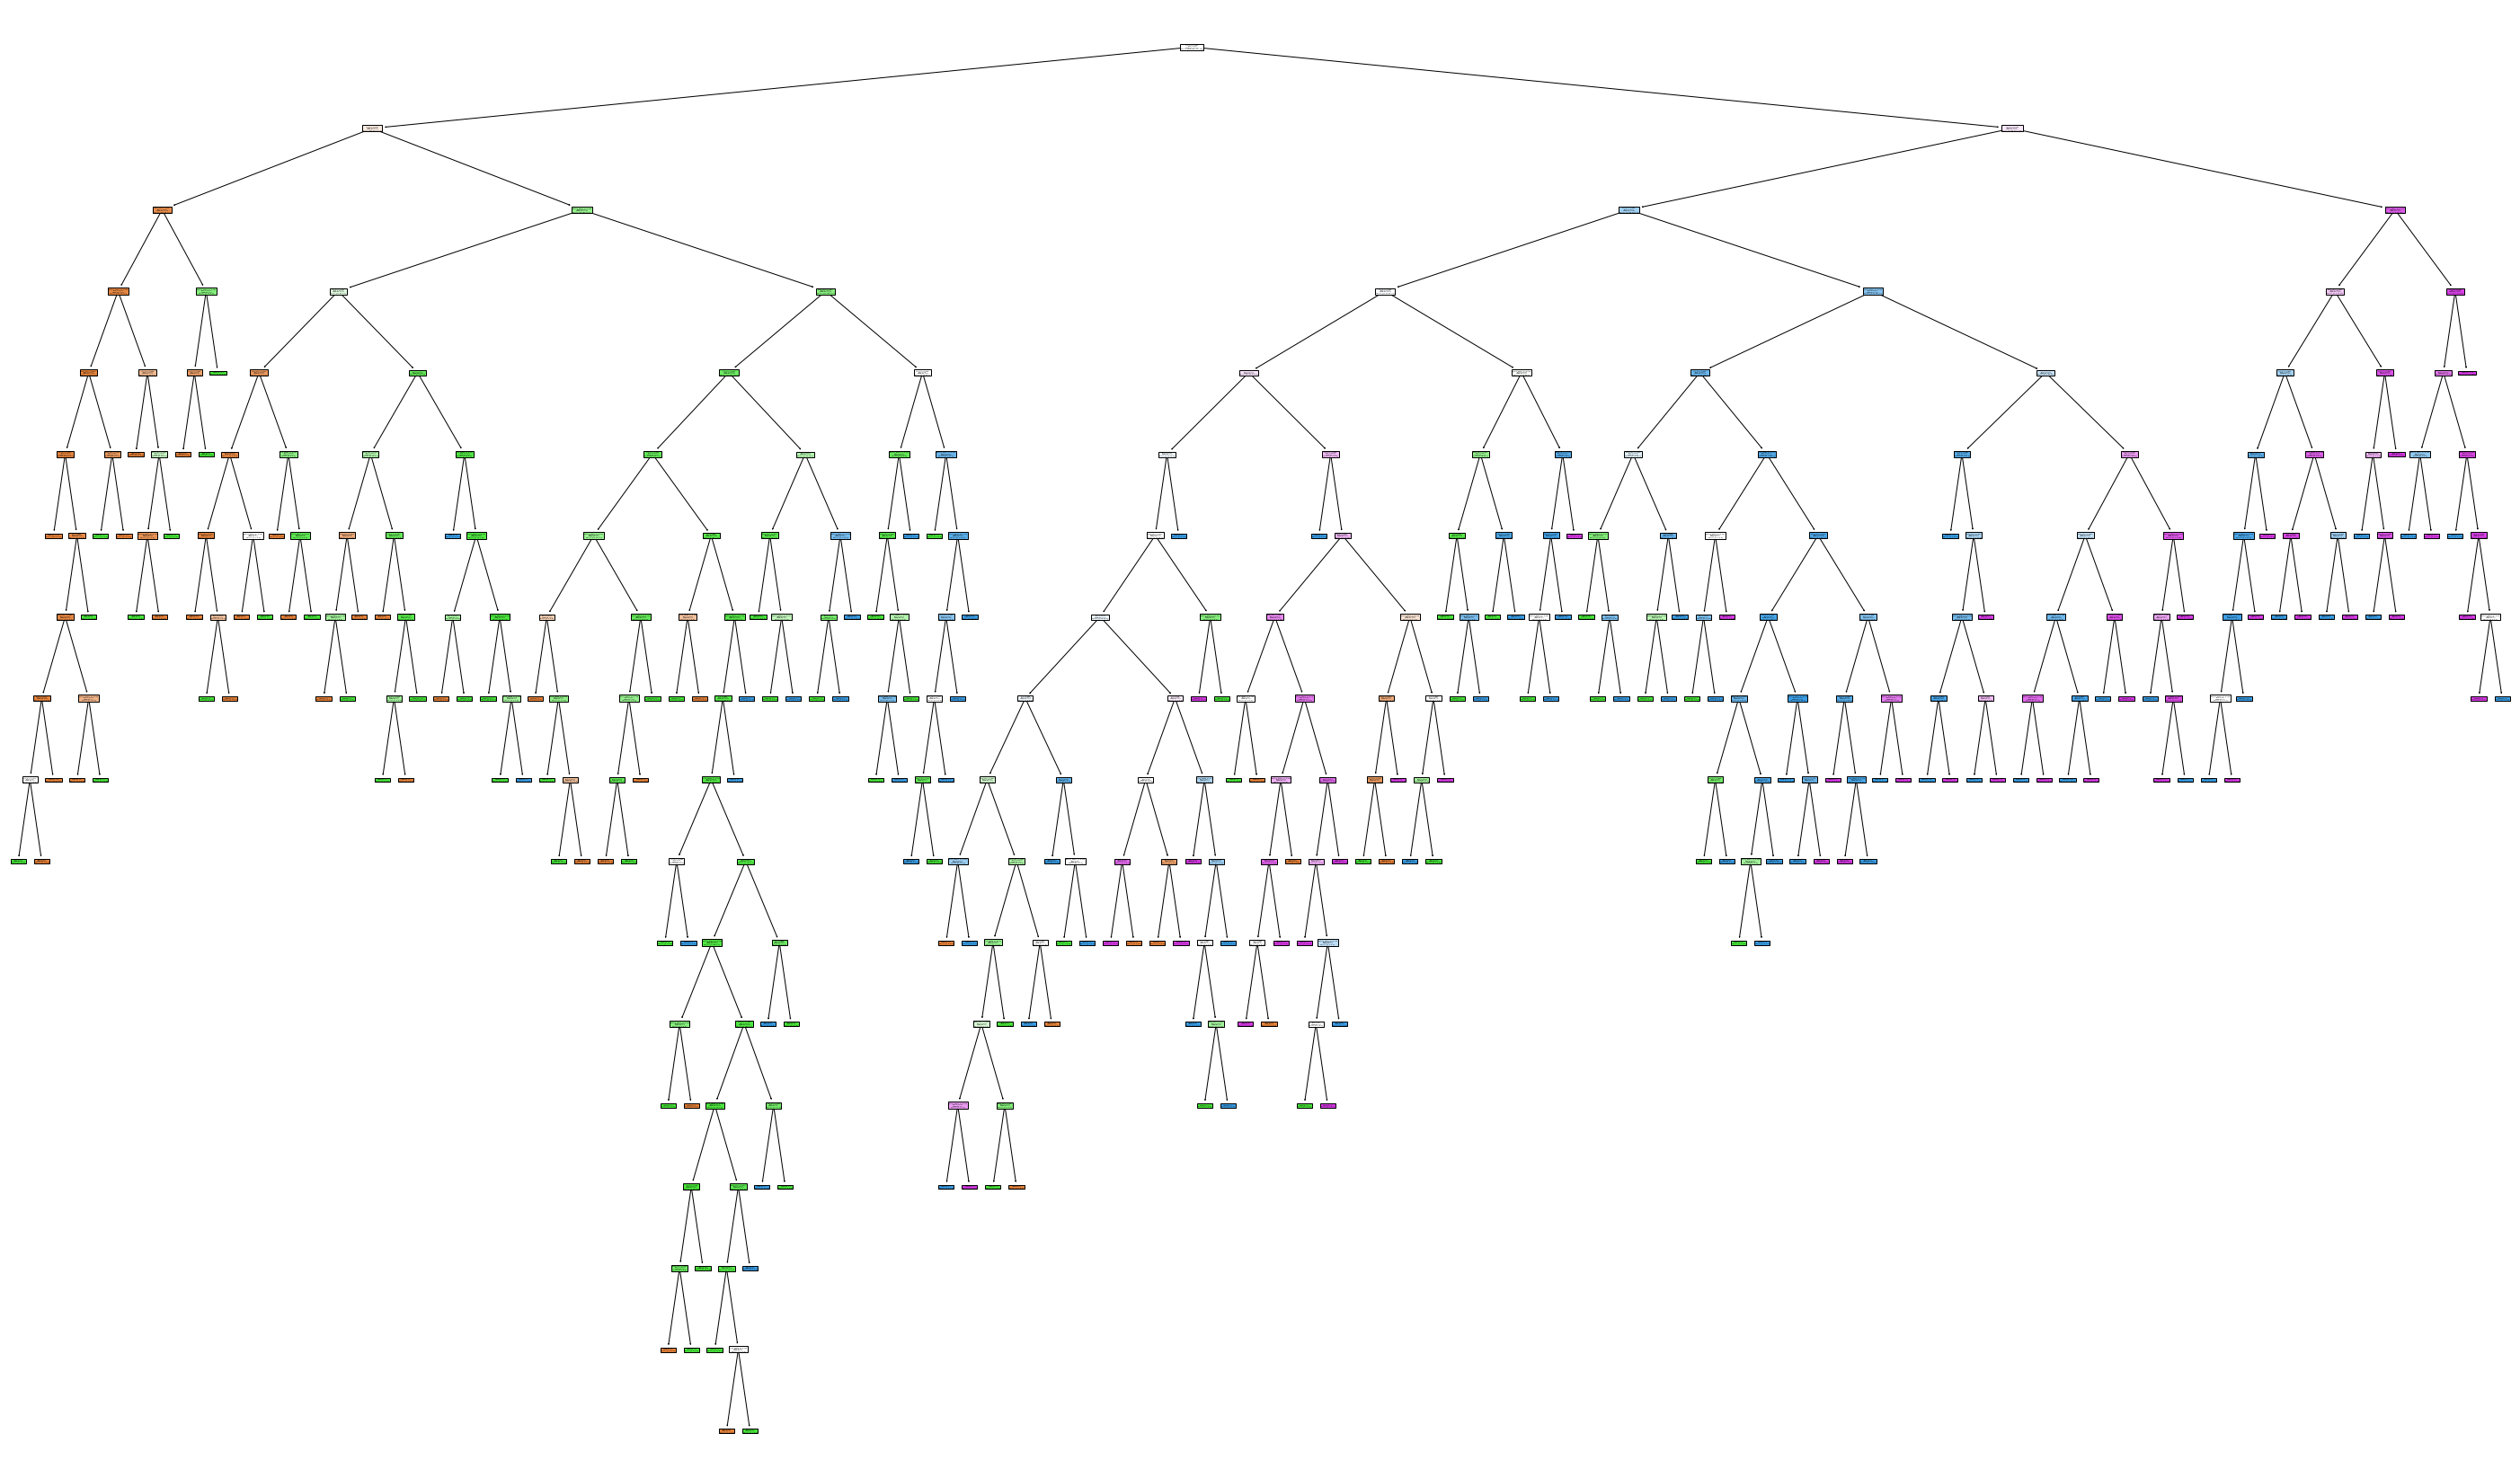

In [25]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(dT, feature_names=pd.Series(X.columns).array, filled=True)

In [19]:
dT = DecisionTreeClassifier(min_samples_leaf=50)
dT.fit(X_train_scaled, y_train)
pred = dT.predict(X_test_scaled)
print(dT)
print(classification_report(y_test, pred, zero_division=0))

DecisionTreeClassifier(min_samples_leaf=50)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       0.65      0.73      0.69       101
           2       0.69      0.52      0.60       103
           3       0.77      0.87      0.82       101

    accuracy                           0.75       405
   macro avg       0.75      0.75      0.75       405
weighted avg       0.75      0.75      0.75       405



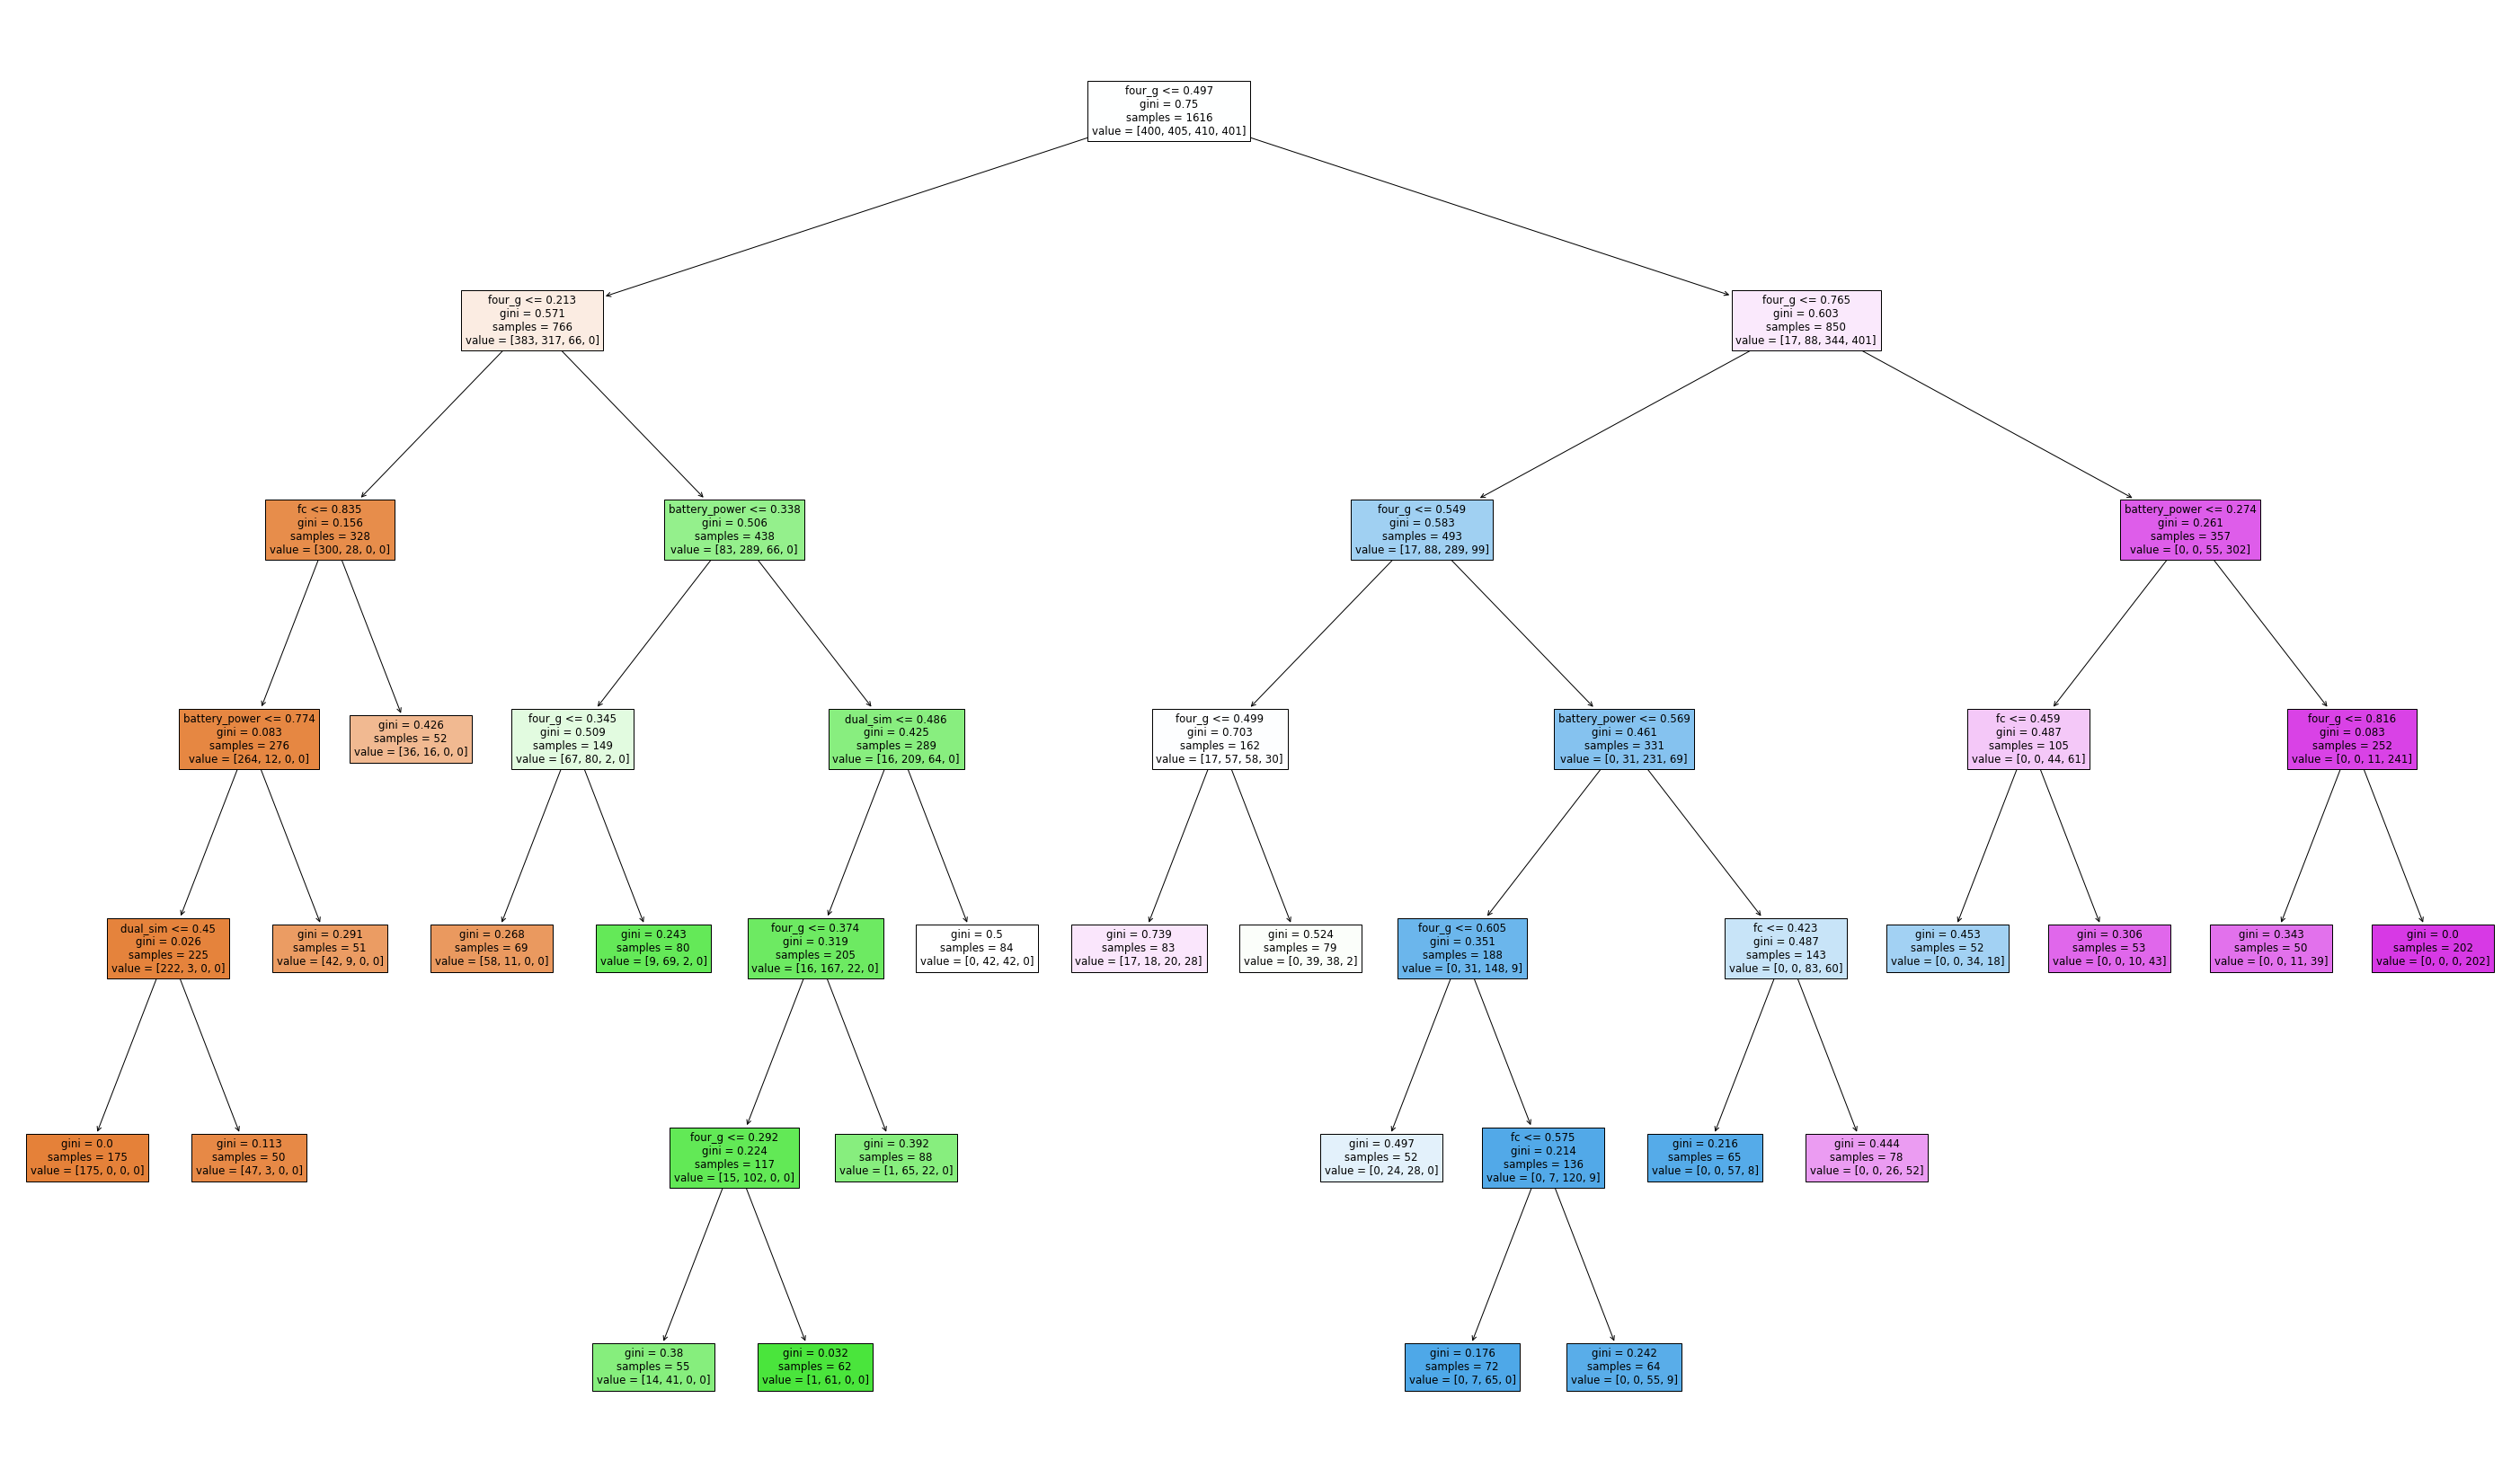

In [22]:

fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(dT, feature_names=pd.Series(X.columns).array, filled=True)

In [51]:
dT = DecisionTreeClassifier(min_samples_split=10, max_depth=20, criterion='entropy', min_samples_leaf = 2)
dT.fit(X_train_scaled, y_train)
pred = dT.predict(X_test_scaled)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.81      0.84      0.83       101
           2       0.84      0.79      0.81       103
           3       0.89      0.86      0.87       101

    accuracy                           0.85       405
   macro avg       0.85      0.85      0.85       405
weighted avg       0.85      0.85      0.85       405



In [49]:
dT = DecisionTreeClassifier(min_samples_split=5, max_depth=20, criterion='entropy', min_samples_leaf = 2)
dT.fit(X_train_scaled, y_train)
pred = dT.predict(X_test_scaled)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       100
           1       0.83      0.83      0.83       101
           2       0.87      0.78      0.82       103
           3       0.88      0.90      0.89       101

    accuracy                           0.86       405
   macro avg       0.86      0.86      0.86       405
weighted avg       0.86      0.86      0.86       405



In [50]:
dT = DecisionTreeClassifier(min_samples_split=7, max_depth=20, criterion='entropy', min_samples_leaf = 2)
dT.fit(X_train_scaled, y_train)
pred = dT.predict(X_test_scaled)
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.80      0.85      0.83       101
           2       0.85      0.80      0.82       103
           3       0.90      0.86      0.88       101

    accuracy                           0.86       405
   macro avg       0.86      0.86      0.86       405
weighted avg       0.86      0.86      0.86       405



### Random Forest

We will use several parameters to determine the best parameter for the random forest.

In [53]:
rF = RandomForestClassifier()
rF.fit(X_train_scaled, y_train)
rFPred = rF.predict(X_test_scaled)
print(classification_report(y_test, rFPred, zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.88      0.88      0.88       101
           2       0.88      0.88      0.88       103
           3       0.95      0.93      0.94       101

    accuracy                           0.92       405
   macro avg       0.92      0.92      0.92       405
weighted avg       0.92      0.92      0.92       405



We will perform hyperparameter tuning to determine the optimal parameters for the decision tree.

In [69]:
param_grid_rF = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2,3,7,11,13],
               'max_depth' : [2,3,9,15,20],
                }

clf_rF = GridSearchCV(estimator= rF, 
                   param_grid=param_grid_rF, cv= kfold)
clf_rF.fit(X_train_scaled, y_train)
print(clf_rF.best_params_)
best_rF = RandomForestClassifier(**clf_rF.best_params_)
best_rF.fit(X_train_scaled, y_train)
rFPred2 = best_rF.predict(X_test_scaled)
print(classification_report(y_test, rFPred2, zero_division=0))

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.88      0.88      0.88       101
           2       0.88      0.89      0.89       103
           3       0.93      0.94      0.94       101

    accuracy                           0.92       405
   macro avg       0.92      0.92      0.92       405
weighted avg       0.92      0.92      0.92       405



### Naive Bayes

In [71]:
import seaborn as sns

sns.set()

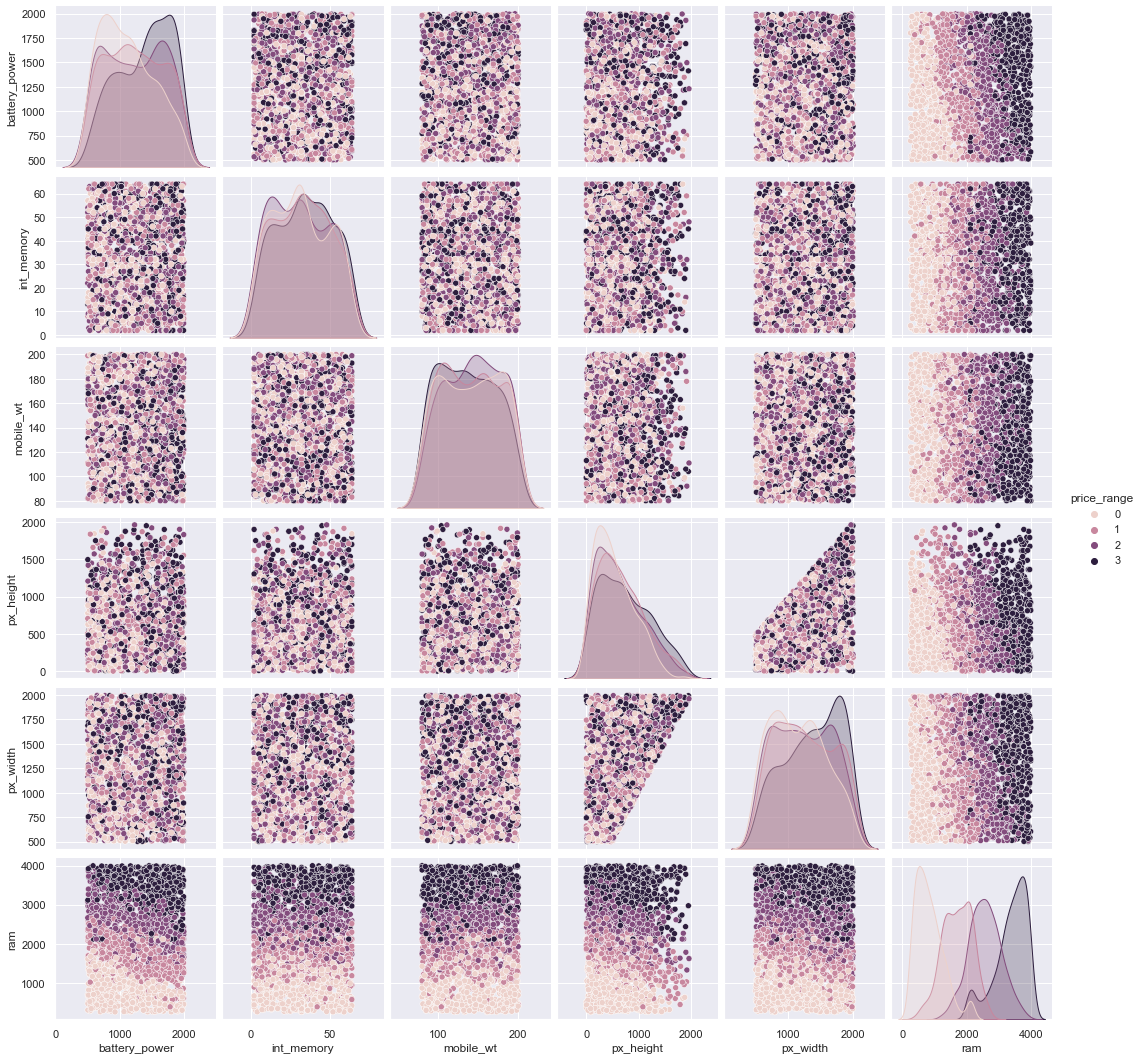

In [73]:
sns.pairplot(mobile[['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'price_range']],hue ='price_range')

In [77]:
modelnb = GaussianNB()
modelnb.fit(X_train_scaled,y_train)
prednb = modelnb.predict(X_test_scaled)
print(classification_report(y_test, prednb, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.71      0.68      0.70       101
           2       0.70      0.73      0.71       103
           3       0.90      0.91      0.91       101

    accuracy                           0.80       405
   macro avg       0.81      0.81      0.81       405
weighted avg       0.81      0.80      0.80       405



In this case, we will use Gaussian Naive Bayes because the data appears to follow a normal distribution.

### K-nearest Neighbors

In [78]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_scaled, y_train)
predK = KNN.predict(X_test_scaled)
print(classification_report(y_test, predK, zero_division=0))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       100
           1       0.73      0.73      0.73       101
           2       0.67      0.72      0.69       103
           3       0.86      0.74      0.80       101

    accuracy                           0.77       405
   macro avg       0.78      0.77      0.77       405
weighted avg       0.78      0.77      0.77       405



In [83]:
# parameter yang akan di tunning
model = KNeighborsClassifier()
tunned_params = [
  { 
    'n_neighbors': [5,6,7,8]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=kfold,
                   verbose = 2
                    )
clfKNN.fit(X_train_scaled, y_train)
predKNN = clfKNN.predict(X_test_scaled)
print(classification_report(y_test, predKNN, zero_division=0))

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[C

### The best model is Random Forest. Random Forest constructs multiple decision trees and combines their results, resulting in more accurate predictions. As seen in the results of individual decision trees, the accuracy is already good, but combining several of them improves accuracy even further.